### Loading the DataSet

In [29]:
# import necessary libraries
import os
import pandas as pd
import numpy as np

# load Data
data_path = os.path.join(os.getcwd(), "data", "weatherAUS.csv")
df = pd.read_csv(data_path)

# ensure data has been loaded
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Understand the Data (Scoping)

What is the goal/origin of the dataset:
* predicting tommorrows rain
* data is from historical weather data from the last 10 years
* 'RainTomorrow' == Yes if the rain >1mm

neccessary clarifications:
* What is the problem we are trying to solve?
* why is it important for our business to solve this problem (big picture)?
* Where will we use ML in the process?
* How has the problem been solved before?
* How will we use the results of the model?
* Which is the worst error our model can make?
* How will we measure the success of the model?


| Name                | Description                                                          | Measurement Unit | Data Type | Possible Values/Range                                 |
|---------------------|----------------------------------------------------------------------|------------|------------------|--------------------------------------------------------|
| Date          | The date of observation || date | as timestamp in the Format "YYYY-mm-dd" |
| Location      | City ||String| |
| MinTemp       | The minimum temperature in degrees celsius || float ||
| MaxTemp       | The maximum temperature in degrees celsius || float ||
| Rainfall      | The amount of rainfall recorded for the day in mm|| float ||
| Evaporation   | The so-called Class A pan evaporation (mm) in the 24 hours to 9am|| float ||
| Sunshine      | The number of hours of bright sunshine in the day.|| float ||
| WindGustDir   | The direction of the strongest wind gust in the 24 hours to midnight || String | ['N', 'NE', 'NNE'] |
| WindGustSpeed | The speed (km/h) of the strongest wind gust in the 24 hours to midnight ||||
| WindDir9am    | The direction of the Wind ||||
| WindDir3pm    | The direction of the Wind ||||
| WindSpeed9am  | Wind speed (km/hr) averaged over 10 minutes prior to 9am ||||
| WindSpeed3pm  | Wind speed (km/hr) averaged over 10 minutes prior to 3pm ||||
| Humidity9am   | Humidity (percent) at 9am || float | %|
| Humidity3pm   | Humidity (percent) at 3pm || float | %|
| Pressure9am   | Atmospheric pressure (hpa) reduced to mean sea level at 9am||||
| Pressure3pm   | Atmospheric pressure (hpa) reduced to mean sea level at 3am||||
| Cloud9am      | Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.|| int | values between 1 to 9 |
| Cloud3pm      | raction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values || int | values between 1 to 9 |
| Temp9am       | Temperature (degrees C) at 9pm ||||
| Temp3pm       | Temperature (degrees C) at 3pm ||||
| RainToday     | Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0 || bool ||
| RainTomorrow  | The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".||||


In [12]:
# first overview of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [13]:
# arithmetic analysis
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Modeling the Data

## Transform the data
What are the 

<Axes: xlabel='RainTomorrow', ylabel='Count'>

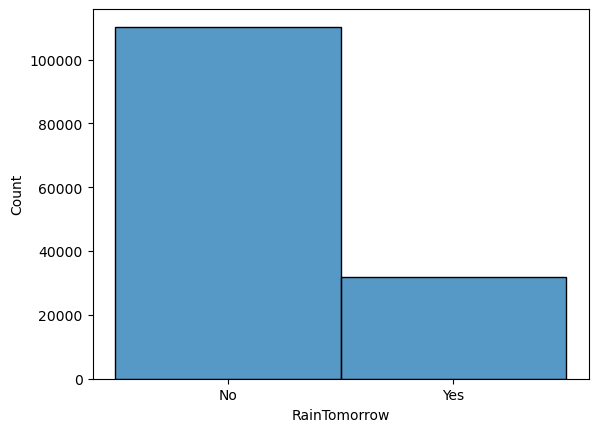

In [15]:
# importing necessary libraries for plots
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df, x="RainTomorrow")

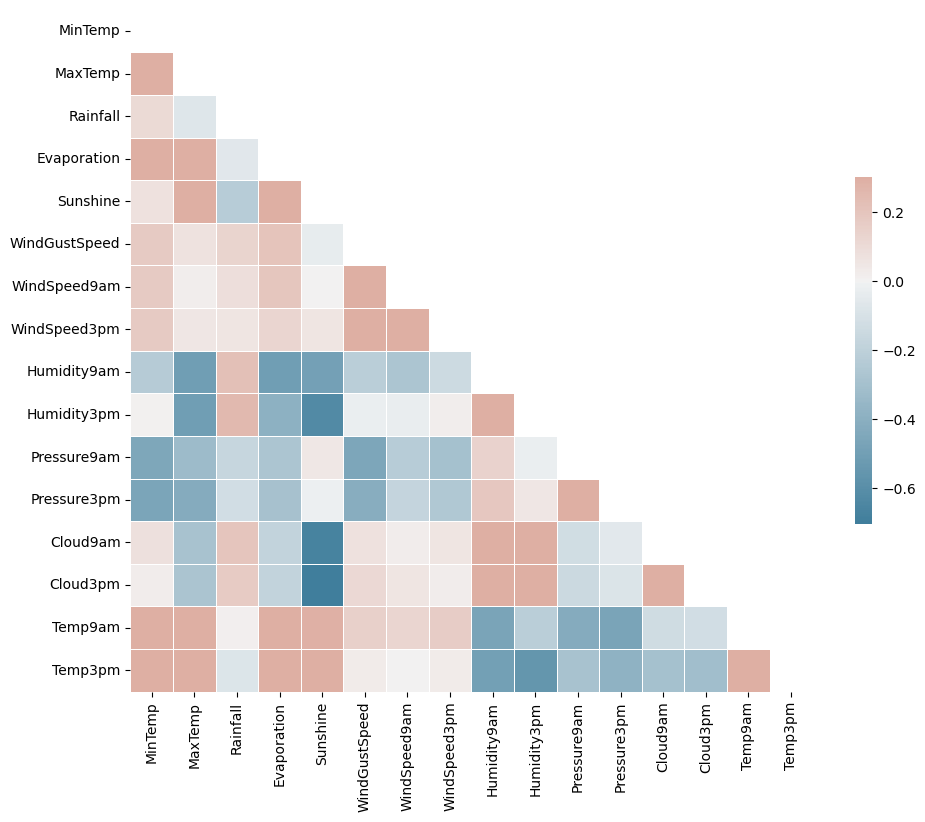

In [30]:
# any close correlation?
num_columns=[]
obj_columns=[]
for feature in df.columns:
    if df[feature].dtype!="object":
        num_columns.append(feature)
    else:
        obj_columns.append(feature)


corr = df[num_columns].corr()

# Compute the correlation matrix
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [ ]:
sns.pairplot(df, hue="RainTomorrow")

In [ ]:
# different views on RainTomorrow

# correlation with 'Pressure'


#sns.histplot(data=df, x="Pressure3pm", hue="RainTomorrow", multiple="dodge");
#sns.histplot(data=df, x="Pressure9am", hue="RainTomorrow", multiple="stack");
#sns.histplot(data=df, x="Pressure3pm", hue="RainTomorrow", multiple="stack");

<Axes: xlabel='RainToday', ylabel='Count'>

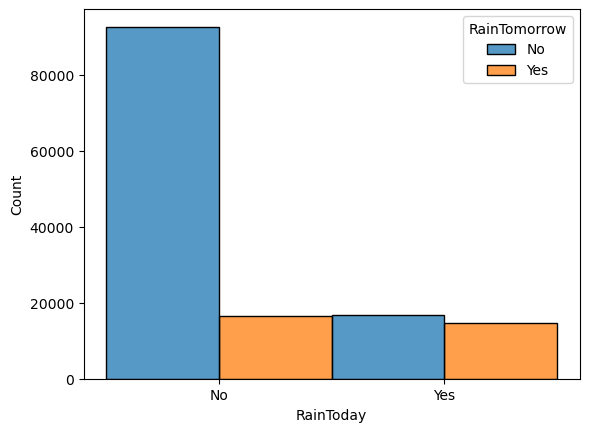

In [37]:
# broad overview of mutual correlating columns
sns.histplot(data=df, x="RainToday", hue="RainTomorrow", multiple="dodge")

<Axes: xlabel='WindSpeed3pm', ylabel='Count'>

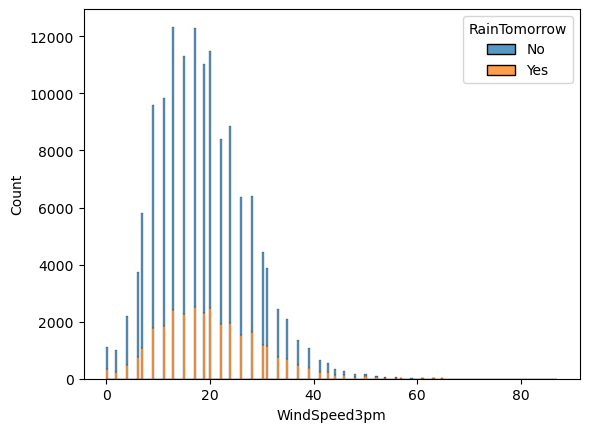

In [34]:
# see the wind direction
#sns.histplot(data=df, x="WindSpeed9am", hue="RainTomorrow", multiple="stack")
sns.histplot(data=df, x="WindSpeed3pm", hue="RainTomorrow", multiple="stack")

### Analyse
Abhängigkeiten scheinen folgende zu sein:
* Regen bedingt durch => Temp, Pressure, Sunshine
* Regen neg. bedingt durch => Cloud, Humidity

Questions to answer:
* gleich. Verteilung der Daten auf die Städte?

<Axes: xlabel='Location', ylabel='Count'>

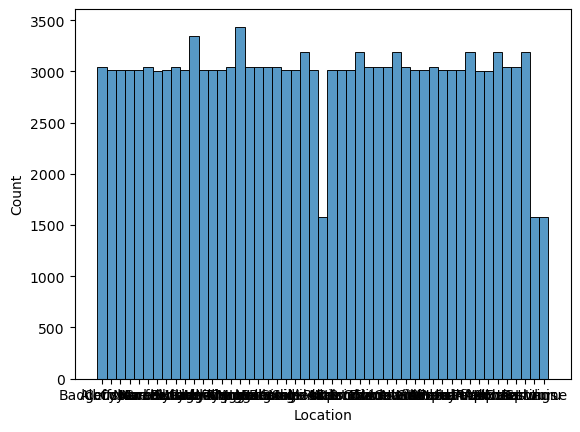

In [38]:
sns.histplot(data=df, x="Location")